In [2]:
import os

### openBLAS will not work properly in jupyter notebook
os.environ['OPENBLAS_NUM_THREADS'] = '1'

import pandas as pd
import numpy as np
from scipy import stats as ss
import snapatac2 as snap
import scanpy as sc
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors

/home/y2xie/miniconda3/envs/seurat/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/y2xie/miniconda3/envs/seurat/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/y2xie/miniconda3/envs/seurat/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/y2xie/miniconda3/envs/seurat/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/y2xie/miniconda3/envs/seurat/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Impor

## Read and merge DNA doublet score meta for filtering

In [3]:
rmeta = pd.read_csv('02.RNA/MiniAtlas_all_RNA_merged_clean_metadata_250423.txt', sep = '\t')
dna = np.unique(rmeta['dna'].dropna())
file_dna = [name + "_processed.h5ad" for name in dna]

dmeta = []

for i, file in enumerate(file_dna):
    data = snap.read("/projects/ps-renlab2/y2xie/projects/BICAN/analysis/03.doublet_removal/snapatac2/" + file)
    tmp_meta = pd.DataFrame(data.obs[:], index = [dna[i] + ":" + dd for dd in data.obs_names], columns = data.obs[:].columns) 
    dmeta.append(tmp_meta[['n_fragment','frac_dup','frac_mito','doublet_probability','doublet_score']])
    data.close()

/tmp/ipykernel_1202107/1850366571.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  rmeta = pd.read_csv('02.RNA/MiniAtlas_all_RNA_merged_clean_metadata_250423.txt', sep = '\t')
/tmp/ipykernel_1202107/1850366571.py:9: DeprecationWarning: `Series._import_from_c` is deprecated. use _import_arrow_from_c; if you are using an extension, please compile it with latest 'pyo3-polars'
  tmp_meta = pd.DataFrame(data.obs[:], index = [dna[i] + ":" + dd for dd in data.obs_names], columns = data.obs[:].columns)
/tmp/ipykernel_1202107/1850366571.py:9: DeprecationWarning: `Series._import_from_c` is deprecated. use _import_arrow_from_c; if you are using an extension, please compile it with latest 'pyo3-polars'
  tmp_meta = pd.DataFrame(data.obs[:], index = [dna[i] + ":" + dd for dd in data.obs_names], columns = data.obs[:].columns)
/tmp/ipykernel_1202107/1850366571.py:9: DeprecationWarning: `Series._import_from_c` is deprecated. use _import_arrow

/tmp/ipykernel_1202107/1850366571.py:9: DeprecationWarning: `Series._import_from_c` is deprecated. use _import_arrow_from_c; if you are using an extension, please compile it with latest 'pyo3-polars'
  tmp_meta = pd.DataFrame(data.obs[:], index = [dna[i] + ":" + dd for dd in data.obs_names], columns = data.obs[:].columns)
/tmp/ipykernel_1202107/1850366571.py:9: DeprecationWarning: `Series._import_from_c` is deprecated. use _import_arrow_from_c; if you are using an extension, please compile it with latest 'pyo3-polars'
  tmp_meta = pd.DataFrame(data.obs[:], index = [dna[i] + ":" + dd for dd in data.obs_names], columns = data.obs[:].columns)
/tmp/ipykernel_1202107/1850366571.py:9: DeprecationWarning: `Series._import_from_c` is deprecated. use _import_arrow_from_c; if you are using an extension, please compile it with latest 'pyo3-polars'
  tmp_meta = pd.DataFrame(data.obs[:], index = [dna[i] + ":" + dd for dd in data.obs_names], columns = data.obs[:].columns)
/tmp/ipykernel_1202107/18503

/tmp/ipykernel_1202107/1850366571.py:9: DeprecationWarning: `Series._import_from_c` is deprecated. use _import_arrow_from_c; if you are using an extension, please compile it with latest 'pyo3-polars'
  tmp_meta = pd.DataFrame(data.obs[:], index = [dna[i] + ":" + dd for dd in data.obs_names], columns = data.obs[:].columns)
/tmp/ipykernel_1202107/1850366571.py:9: DeprecationWarning: `Series._import_from_c` is deprecated. use _import_arrow_from_c; if you are using an extension, please compile it with latest 'pyo3-polars'
  tmp_meta = pd.DataFrame(data.obs[:], index = [dna[i] + ":" + dd for dd in data.obs_names], columns = data.obs[:].columns)
/tmp/ipykernel_1202107/1850366571.py:9: DeprecationWarning: `Series._import_from_c` is deprecated. use _import_arrow_from_c; if you are using an extension, please compile it with latest 'pyo3-polars'
  tmp_meta = pd.DataFrame(data.obs[:], index = [dna[i] + ":" + dd for dd in data.obs_names], columns = data.obs[:].columns)
/tmp/ipykernel_1202107/18503

/tmp/ipykernel_1202107/1850366571.py:9: DeprecationWarning: `Series._import_from_c` is deprecated. use _import_arrow_from_c; if you are using an extension, please compile it with latest 'pyo3-polars'
  tmp_meta = pd.DataFrame(data.obs[:], index = [dna[i] + ":" + dd for dd in data.obs_names], columns = data.obs[:].columns)
/tmp/ipykernel_1202107/1850366571.py:9: DeprecationWarning: `Series._import_from_c` is deprecated. use _import_arrow_from_c; if you are using an extension, please compile it with latest 'pyo3-polars'
  tmp_meta = pd.DataFrame(data.obs[:], index = [dna[i] + ":" + dd for dd in data.obs_names], columns = data.obs[:].columns)
/tmp/ipykernel_1202107/1850366571.py:9: DeprecationWarning: `Series._import_from_c` is deprecated. use _import_arrow_from_c; if you are using an extension, please compile it with latest 'pyo3-polars'
  tmp_meta = pd.DataFrame(data.obs[:], index = [dna[i] + ":" + dd for dd in data.obs_names], columns = data.obs[:].columns)
/tmp/ipykernel_1202107/18503

/tmp/ipykernel_1202107/1850366571.py:9: DeprecationWarning: `Series._import_from_c` is deprecated. use _import_arrow_from_c; if you are using an extension, please compile it with latest 'pyo3-polars'
  tmp_meta = pd.DataFrame(data.obs[:], index = [dna[i] + ":" + dd for dd in data.obs_names], columns = data.obs[:].columns)
/tmp/ipykernel_1202107/1850366571.py:9: DeprecationWarning: `Series._import_from_c` is deprecated. use _import_arrow_from_c; if you are using an extension, please compile it with latest 'pyo3-polars'
  tmp_meta = pd.DataFrame(data.obs[:], index = [dna[i] + ":" + dd for dd in data.obs_names], columns = data.obs[:].columns)
/tmp/ipykernel_1202107/1850366571.py:9: DeprecationWarning: `Series._import_from_c` is deprecated. use _import_arrow_from_c; if you are using an extension, please compile it with latest 'pyo3-polars'
  tmp_meta = pd.DataFrame(data.obs[:], index = [dna[i] + ":" + dd for dd in data.obs_names], columns = data.obs[:].columns)
/tmp/ipykernel_1202107/18503

In [4]:
print(len(np.unique([str(element) for element in rmeta['dna']])))
print(len(dmeta))

127
127


In [11]:
cdmeta = pd.concat(dmeta, axis=0)
print(cdmeta.shape)

(1480287, 5)


In [25]:
cdmeta.to_csv('01.DNA/MiniAtlas_all_DNA_merged_clean_metadata_250423.txt', sep = '\t')

## Read in filtered clean RNA cells for filtering

In [26]:
adatas = ["/projects/ps-renlab2/y2xie/projects/BICAN/analysis/03.doublet_removal/snapatac2/" + name for name in file_dna]
data = snap.AnnDataSet(
    adatas = [(name, adata) for name, adata in zip(dna, adatas)],
    filename = "01.DNA/MiniAtlas_DNA_merged_clean_250423.h5ads"
)

### make sure barcode is unique
unique_cell_ids = [sa + ':' + bc for sa, bc in zip(data.obs['sample'], data.obs_names)]
data.obs_names = unique_cell_ids

### Convert to anndata in memory and subset singlet
data = data.to_adata()

Unable to create stacked arrays for these keys: fragment_paired,X_spectral
/tmp/ipykernel_1202107/4103743715.py:8: DeprecationWarning: `Series._import_from_c` is deprecated. use _import_arrow_from_c; if you are using an extension, please compile it with latest 'pyo3-polars'
  unique_cell_ids = [sa + ':' + bc for sa, bc in zip(data.obs['sample'], data.obs_names)]
/tmp/ipykernel_1202107/4103743715.py:12: DeprecationWarning: `Series._import_from_c` is deprecated. use _import_arrow_from_c; if you are using an extension, please compile it with latest 'pyo3-polars'
  data = data.to_adata()
/tmp/ipykernel_1202107/4103743715.py:12: DeprecationWarning: `Series._import_from_c` is deprecated. use _import_arrow_from_c; if you are using an extension, please compile it with latest 'pyo3-polars'
  data = data.to_adata()


In [ ]:
data = data[cdmeta.dna_bc,:]
data.obs = cdmeta.set_index('dna_bc').loc[data.obs_names]
num_cols = data.obs.select_dtypes(include=['number']).columns
data.obs[num_cols] = data.obs[num_cols].astype(str)

data.write("01.DNA/MiniAtlas_DNA_merged_clean_250423.h5ad")

... storing 'n_fragment' as categorical
... storing 'nCount_RNA' as categorical
... storing 'nFeature_RNA' as categorical
... storing 'percent.mt' as categorical
... storing 'percent.ribo' as categorical


In [ ]:
### This results is obtained at level2 clustering in RNA modality
cmeta = pd.read_csv("02.RNA/02.l2_clustering/MiniAtlas_RNA_merged_filt_250513.meta.txt", sep = '\t')
cmeta['dna_bc'] = cmeta['dna'] + ":" + cmeta['atac_bc']

tdata = data[np.intersect1d(data.obs_names, cmeta['dna_bc']),:]
tdata.write("01.DNA/MiniAtlas_DNA_merged_filt_250513.h5ad")

## Split into K27ac and K27me3

In [60]:
k27ac_data = tdata[tdata.obs["target"] == "H3K27ac", :]
k27me3_data = tdata[tdata.obs["target"] == "H3K27me3", :]

In [77]:
### dont need to remove sex chromsome: all male donors
tmp = k27ac_data
snap.pp.select_features(tmp, n_features = 100000,
                        blacklist = "/projects/ps-renlab2/y2xie/ps-renlab/y2xie/projects/genome_ref/hg38-blacklist.v2.bed")
snap.tl.spectral(tmp, weighted_by_sd = True, random_state = 921)
if len(tmp.obs_names) >= 500000:
    k = 50
elif (len(tmp.obs_names) >= 200000 & len(tmp.obs_names) < 500000):
    k = 25
else:
    k = 15

### Batch correction
snap.pp.harmony(tmp, batch = 'donor')

print("performing leiden clustering...")
snap.pp.knn(tmp, n_neighbors = k, random_state = 921, use_rep = 'X_spectral_harmony')
snap.tl.umap(tmp, random_state = 921, use_rep = 'X_spectral_harmony')
snap.tl.leiden(tmp, resolution = 0.5, objective_function = 'RBConfiguration',
               use_leidenalg = True, weighted = True)

for col in tmp.obs.columns:
    if tmp.obs[col].dtype == "object":
        try:
            tmp.obs[col] = pd.to_numeric(tmp.obs[col], errors='coerce')
        except:
            tmp.obs[col] = tmp.obs[col].astype(str)

tmp.write("01.DNA/MiniAtlas_H3K27ac_merged_filt_250513.h5ad")

k27ac_data = tmp

In [83]:
tmp = k27me3_data
snap.pp.select_features(tmp, n_features = 100000,
                        blacklist = "/projects/ps-renlab2/y2xie/ps-renlab/y2xie/projects/genome_ref/hg38-blacklist.v2.bed")
snap.tl.spectral(tmp, weighted_by_sd = True, random_state = 921)
if len(tmp.obs_names) >= 500000:
    k = 50
elif (len(tmp.obs_names) >= 200000 & len(tmp.obs_names) < 500000):
    k = 25
else:
    k = 15

### Batch correction
snap.pp.harmony(tmp, batch = 'donor')

print("performing leiden clustering...")
snap.pp.knn(tmp, n_neighbors = k, random_state = 921, use_rep = 'X_spectral_harmony')
snap.tl.umap(tmp, random_state = 921, use_rep = 'X_spectral_harmony')
snap.tl.leiden(tmp, resolution = 0.5, objective_function = 'RBConfiguration',
               use_leidenalg = True, weighted = True)

for col in tmp.obs.columns:
    if tmp.obs[col].dtype == "object":
        try:
            tmp.obs[col] = pd.to_numeric(tmp.obs[col], errors='coerce')
        except:
            tmp.obs[col] = tmp.obs[col].astype(str)
            
tmp.write("01.DNA/MiniAtlas_H3K27me3_merged_filt_250513.h5ad")

k27me3_data = tmp

/home/y2xie/miniconda3/envs/seurat/lib/python3.11/site-packages/snapatac2/preprocessing/_basic.py:976: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['count'] = count
2025-05-14 16:35:33 - INFO - Selected 98951 features.
2025-05-14 16:41:07,205 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-05-14 16:41:07 - INFO - Computing initial centroids with sklearn.KMeans...
2025-05-14 16:41:40,863 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-05-14 16:41:40 - INFO - sklearn.KMeans initialization complete.
2025-05-14 16:41:42,165 - harmonypy - INFO - Iteration 1 of 10
2025-05-14 16:41:42 - INFO - Iteration 1 of 10
2025-05-14 16:43:24,652 - harmonypy - INFO - Iteration 2 of 10
2025-05-14 16:43:24 - INFO - Iteration 2 of 10
2025-05-14 16:45:14,869 - harmonypy - INFO - Iteration 3 of 10
2025-05-14 16:45:14 - INFO - Iteration 3 of 10
2025-05-14 16:46:33,351 - harmonypy - INFO - Converge

performing leiden clustering...


/home/y2xie/miniconda3/envs/seurat/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


/tmp/ipykernel_1202107/1175624616.py:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/y2xie/miniconda3/envs/seurat/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/y2xie/miniconda3/envs/seurat/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


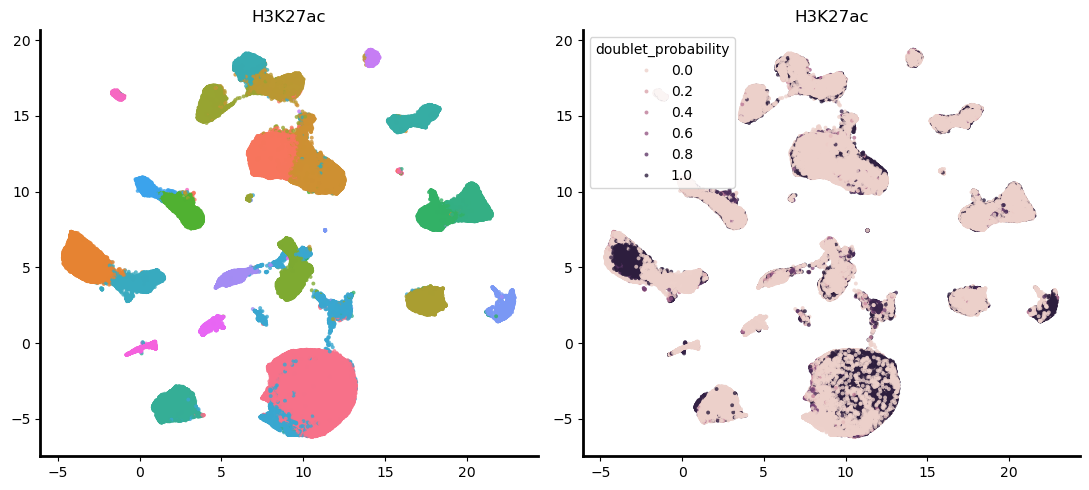

In [92]:
fig, axes = plt.subplots(1, 2, figsize=(11, 5))
yi = k27ac_data.obsm['X_umap']
lmeta = k27ac_data.obs['leiden']

ax = axes[0]
sns.scatterplot(x=yi[:, 0], y=yi[:, 1], ax=ax, s=8, alpha=0.8, 
                linewidth=0, hue=lmeta, legend = False)
ax.set_title('H3K27ac')
sns.despine()
ax.spines['left'].set_linewidth(2) 
ax.spines['bottom'].set_linewidth(2)

lmeta = k27ac_data.obs['doublet_probability']

ax = axes[1]
sns.scatterplot(x=yi[:, 0], y=yi[:, 1], ax=ax, s=8, alpha=0.8, 
                linewidth=0, hue=lmeta)
ax.set_title('H3K27ac')
sns.despine()
ax.spines['left'].set_linewidth(2) 
ax.spines['bottom'].set_linewidth(2)

plt.tight_layout()

/tmp/ipykernel_1202107/2809201464.py:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/y2xie/miniconda3/envs/seurat/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/y2xie/miniconda3/envs/seurat/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


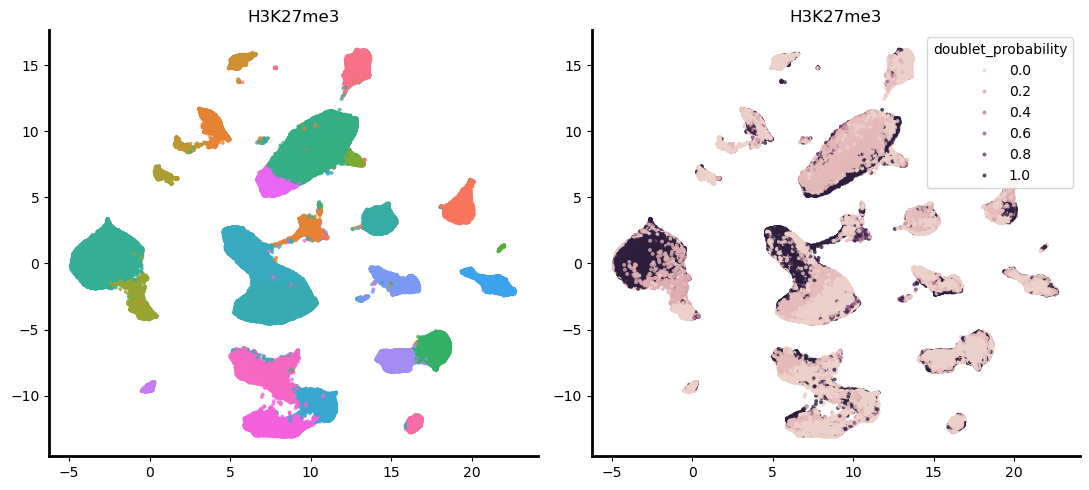

In [94]:
fig, axes = plt.subplots(1, 2, figsize=(11, 5))
yi = k27me3_data.obsm['X_umap']
lmeta = k27me3_data.obs['leiden'].astype(str)

ax = axes[0]
sns.scatterplot(x=yi[:, 0], y=yi[:, 1], ax=ax, s=8, alpha=0.8, 
                linewidth=0, hue=lmeta, legend = False)
ax.set_title('H3K27me3')
sns.despine()
ax.spines['left'].set_linewidth(2) 
ax.spines['bottom'].set_linewidth(2)

lmeta = k27me3_data.obs['doublet_probability']

ax = axes[1]
sns.scatterplot(x=yi[:, 0], y=yi[:, 1], ax=ax, s=8, alpha=0.8, 
                linewidth=0, hue=lmeta)
ax.set_title('H3K27me3')
sns.despine()
ax.spines['left'].set_linewidth(2) 
ax.spines['bottom'].set_linewidth(2)

plt.tight_layout()

In [97]:
k27ac_data.obs.to_csv("01.DNA/MiniAtlas_H3K27ac_merged_filt_250513.meta.csv")
k27me3_data.obs.to_csv("01.DNA/MiniAtlas_H3K27me3_merged_filt_250513.meta.csv")

In [18]:
np.unique(rmeta['DNA_bad'], return_counts=True)

(array([False]), array([794490]))

In [6]:
k27ac_data = snap.read('01.DNA/MiniAtlas_H3K27ac_cortex_cerebellum_240717_rmdoublet_l2_refined.h5ad', backed = None)
k27me3_data = snap.read('01.DNA/MiniAtlas_H3K27me3_cortex_cerebellum_240717_rmdoublet_l2_refined.h5ad', backed = None)

In [7]:
print(len(k27ac_data.obs_names))
print(len(k27me3_data.obs_names))

358534
435968


In [14]:
qcell = np.array(rmeta.loc[rmeta['target'] == 'H3K27ac'].dna_bc)
k27ac_data = k27ac_data[qcell, :]

qcell = np.array(rmeta.loc[rmeta['target'] == 'H3K27me3'].dna_bc)
k27me3_data = k27me3_data[qcell, :]

In [15]:
print(len(k27ac_data.obs_names))
print(len(k27me3_data.obs_names))

358527
435963


In [19]:
### dont need to remove sex chromsome: all male donors
tmp = k27ac_data
snap.pp.select_features(tmp, n_features = 100000,
                        blacklist = "/projects/ps-renlab2/y2xie/ps-renlab/y2xie/projects/genome_ref/hg38-blacklist.v2.bed")
snap.tl.spectral(tmp, weighted_by_sd = True, random_state = 921)
if len(tmp.obs_names) >= 500000:
    k = 50
elif (len(tmp.obs_names) >= 200000 & len(tmp.obs_names) < 500000):
    k = 25
else:
    k = 15

### Batch correction
snap.pp.harmony(tmp, batch = 'donor')

print("performing leiden clustering...")
snap.pp.knn(tmp, n_neighbors = k, random_state = 921, use_rep = 'X_spectral_harmony')
snap.tl.umap(tmp, random_state = 921, use_rep = 'X_spectral_harmony')
snap.tl.leiden(tmp, resolution = 0.5, objective_function = 'RBConfiguration',
               use_leidenalg = True, weighted = True)

for col in tmp.obs.columns:
    if tmp.obs[col].dtype == "object":
        try:
            tmp.obs[col] = pd.to_numeric(tmp.obs[col], errors='coerce')
        except:
            tmp.obs[col] = tmp.obs[col].astype(str)

tmp.write("01.DNA/MiniAtlas_H3K27ac_cortex_cerebellum_refined3_250423.h5ad")

k27ac_data = tmp

/home/y2xie/miniconda3/envs/seurat/lib/python3.11/site-packages/snapatac2/preprocessing/_basic.py:976: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['count'] = count
2025-05-16 12:30:43 - INFO - Selected 99393 features.
2025-05-16 12:33:30,834 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-05-16 12:33:30 - INFO - Computing initial centroids with sklearn.KMeans...
2025-05-16 12:33:53,910 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-05-16 12:33:53 - INFO - sklearn.KMeans initialization complete.
2025-05-16 12:33:54,925 - harmonypy - INFO - Iteration 1 of 10
2025-05-16 12:33:54 - INFO - Iteration 1 of 10
2025-05-16 12:35:10,942 - harmonypy - INFO - Iteration 2 of 10
2025-05-16 12:35:10 - INFO - Iteration 2 of 10
2025-05-16 12:35:41,185 - harmonypy - INFO - Iteration 3 of 10
2025-05-16 12:35:41 - INFO - Iteration 3 of 10
2025-05-16 12:36:04,156 - harmonypy - INFO - Converge

performing leiden clustering...


/home/y2xie/miniconda3/envs/seurat/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/y2xie/miniconda3/envs/seurat/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [20]:
tmp = k27me3_data
snap.pp.select_features(tmp, n_features = 100000,
                        blacklist = "/projects/ps-renlab2/y2xie/ps-renlab/y2xie/projects/genome_ref/hg38-blacklist.v2.bed")
snap.tl.spectral(tmp, weighted_by_sd = True, random_state = 921)
if len(tmp.obs_names) >= 500000:
    k = 50
elif (len(tmp.obs_names) >= 200000 & len(tmp.obs_names) < 500000):
    k = 25
else:
    k = 15

### Batch correction
snap.pp.harmony(tmp, batch = 'donor')

print("performing leiden clustering...")
snap.pp.knn(tmp, n_neighbors = k, random_state = 921, use_rep = 'X_spectral_harmony')
snap.tl.umap(tmp, random_state = 921, use_rep = 'X_spectral_harmony')
snap.tl.leiden(tmp, resolution = 0.5, objective_function = 'RBConfiguration',
               use_leidenalg = True, weighted = True)

for col in tmp.obs.columns:
    if tmp.obs[col].dtype == "object":
        try:
            tmp.obs[col] = pd.to_numeric(tmp.obs[col], errors='coerce')
        except:
            tmp.obs[col] = tmp.obs[col].astype(str)
            
tmp.write("01.DNA/MiniAtlas_H3K27me3_cortex_cerebellum_refined3_250423.h5ad")

k27me3_data = tmp

/home/y2xie/miniconda3/envs/seurat/lib/python3.11/site-packages/snapatac2/preprocessing/_basic.py:976: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['count'] = count
2025-05-16 12:52:46 - INFO - Selected 98920 features.
2025-05-16 12:57:15,653 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-05-16 12:57:15 - INFO - Computing initial centroids with sklearn.KMeans...
2025-05-16 12:57:45,017 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-05-16 12:57:45 - INFO - sklearn.KMeans initialization complete.
2025-05-16 12:57:46,462 - harmonypy - INFO - Iteration 1 of 10
2025-05-16 12:57:46 - INFO - Iteration 1 of 10
2025-05-16 12:59:30,072 - harmonypy - INFO - Iteration 2 of 10
2025-05-16 12:59:30 - INFO - Iteration 2 of 10
2025-05-16 13:01:12,978 - harmonypy - INFO - Iteration 3 of 10
2025-05-16 13:01:12 - INFO - Iteration 3 of 10
2025-05-16 13:01:48,682 - harmonypy - INFO - Converge

performing leiden clustering...


/home/y2xie/miniconda3/envs/seurat/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


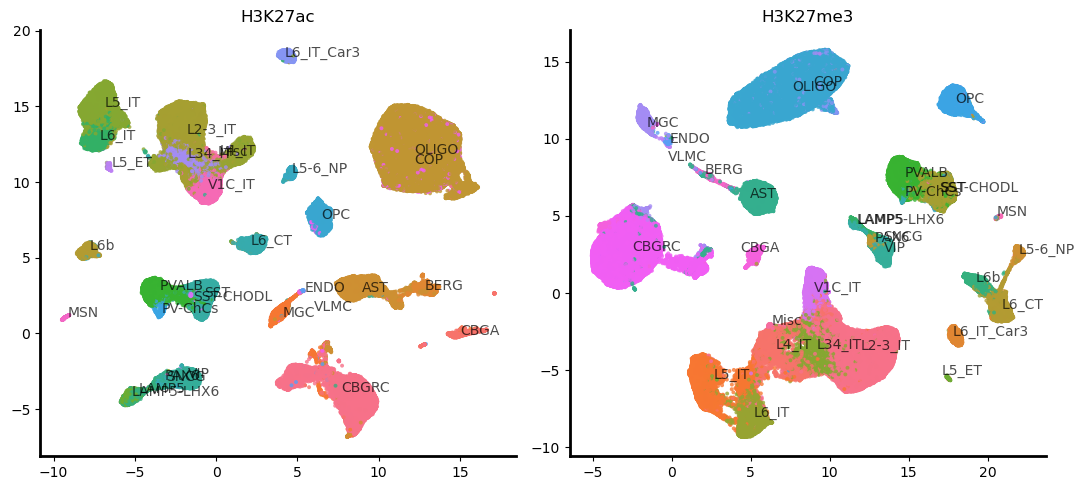

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(11, 5))
yi = k27ac_data.obsm['X_umap']
lmeta = np.array(rmeta.set_index('dna_bc').loc[k27ac_data.obs_names]['l2_anno_corrected'])

ax = axes[0]
sns.scatterplot(x=yi[:, 0], y=yi[:, 1], ax=ax, s=8, alpha=0.8, 
                linewidth=0, hue=lmeta, legend = False)
ax.set_title('H3K27ac')
sns.despine()
ax.spines['left'].set_linewidth(2) 
ax.spines['bottom'].set_linewidth(2)
representative_points = []
for cluster in np.unique(lmeta):
    cluster_indices = np.where(lmeta == cluster)[0]
    centroid = np.mean(yi[cluster_indices,:], axis=0)
    representative_points.append(centroid)

for ii, label in enumerate(np.unique(lmeta)):
    ax.annotate(label, (representative_points[ii][0], representative_points[ii][1]), fontsize=10, alpha=0.7)


yi = k27me3_data.obsm['X_umap']
lmeta = np.array(rmeta.set_index('dna_bc').loc[k27me3_data.obs_names]['l2_anno_corrected'])

ax = axes[1]
sns.scatterplot(x=yi[:, 0], y=yi[:, 1], ax=ax, s=8, alpha=0.8, 
                linewidth=0, hue=lmeta, legend = False)
ax.set_title('H3K27me3')
sns.despine()
ax.spines['left'].set_linewidth(2) 
ax.spines['bottom'].set_linewidth(2)
representative_points = []
for cluster in np.unique(lmeta):
    cluster_indices = np.where(lmeta == cluster)[0]
    centroid = np.mean(yi[cluster_indices,:], axis=0)
    representative_points.append(centroid)

for ii, label in enumerate(np.unique(lmeta)):
    ax.annotate(label, (representative_points[ii][0], representative_points[ii][1]), fontsize=10, alpha=0.7)

    
plt.tight_layout()